In [1]:
pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 62.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet('data.parquet')

In [3]:
df

,date,ric,time,side,qty,price
0,2018-01-02,CLI.N,3.450004e+13,-1,100,39.11
1,2018-01-02,CLI.N,3.450004e+13,1,200,39.11
2,2018-01-02,CLI.N,3.450004e+13,-1,37,39.11
3,2018-01-02,TXRH.OQ,3.450016e+13,1,2,49.10
4,2018-01-02,TXRH.OQ,3.450016e+13,1,12,49.10
...,...,...,...,...,...,...
2010830,2018-01-31,GCBC.OQ,5.669966e+13,-1,5,47.44
2010831,2018-01-31,RGS.N,5.669975e+13,1,100,27.67
2010832,2018-01-31,WGL.N,5.669998e+13,1,100,37.57
2010833,2018-01-31,WGL.N,5.669998e+13,1,100,37.57


In [4]:
df['prevside'] = df.groupby(['date', 'ric'])['side'].shift(1)

In [5]:
df.drop(columns=["date", "ric"]).corr()

,time,side,qty,price,prevside
time,1.000000,0.003744,0.013297,0.052956,0.003732
side,0.003744,1.000000,-0.000742,-0.000375,0.427727
qty,0.013297,-0.000742,1.000000,-0.101388,0.003302
price,0.052956,-0.000375,-0.101388,1.000000,-0.000393
prevside,0.003732,0.427727,0.003302,-0.000393,1.000000


In [6]:
N = 300*10**9

In [7]:
df['bucket'] = df['time']*(1-(1/N))

In [8]:
df

,date,ric,time,side,qty,price,prevside,bucket
0,2018-01-02,CLI.N,3.450004e+13,-1,100,39.11,NaN,3.450004e+13
1,2018-01-02,CLI.N,3.450004e+13,1,200,39.11,-1.0,3.450004e+13
2,2018-01-02,CLI.N,3.450004e+13,-1,37,39.11,1.0,3.450004e+13
3,2018-01-02,TXRH.OQ,3.450016e+13,1,2,49.10,NaN,3.450016e+13
4,2018-01-02,TXRH.OQ,3.450016e+13,1,12,49.10,1.0,3.450016e+13
...,...,...,...,...,...,...,...,...
2010830,2018-01-31,GCBC.OQ,5.669966e+13,-1,5,47.44,-1.0,5.669966e+13
2010831,2018-01-31,RGS.N,5.669975e+13,1,100,27.67,-1.0,5.669975e+13
2010832,2018-01-31,WGL.N,5.669998e+13,1,100,37.57,-1.0,5.669998e+13
2010833,2018-01-31,WGL.N,5.669998e+13,1,100,37.57,1.0,5.669998e+13


In [9]:
df['nettraded'] = df['side']*df['qty']*df['price']

In [10]:
df.groupby(['date', 'ric', 'bucket']).sum().reset_index()

,date,ric,bucket,time,side,qty,price,prevside,nettraded
0,2018-01-02,AAXN.OQ,3.457517e+13,3.457517e+13,1,5,41.50,0.0,207.50
1,2018-01-02,AAXN.OQ,3.487881e+13,3.487881e+13,1,95,41.50,1.0,3942.50
2,2018-01-02,AAXN.OQ,3.488408e+13,3.488408e+13,-1,100,41.55,1.0,-4155.00
3,2018-01-02,AAXN.OQ,3.488524e+13,3.488524e+13,-1,100,41.65,-1.0,-4165.00
4,2018-01-02,AAXN.OQ,3.503772e+13,1.051132e+14,-1,310,123.25,-3.0,-4505.50
...,...,...,...,...,...,...,...,...,...
1266272,2018-01-31,XEC.N,5.650676e+13,5.650676e+13,1,36,19.58,-1.0,704.88
1266273,2018-01-31,XEC.N,5.650679e+13,5.650679e+13,1,610,19.59,1.0,11949.90
1266274,2018-01-31,XEC.N,5.659099e+13,1.697730e+14,1,124,58.79,3.0,-1449.41
1266275,2018-01-31,XEC.N,5.660598e+13,1.132120e+14,2,122,39.20,0.0,2391.20


In [11]:
for k in range(10):
    df[f'prevnettraded{k}'] = df.groupby(['date', 'ric'])['nettraded'].shift(k)

In [12]:
df.drop(columns=["date", "ric"]).corr()

,time,side,qty,price,prevside,bucket,nettraded,prevnettraded0,prevnettraded1,prevnettraded2,prevnettraded3,prevnettraded4,prevnettraded5,prevnettraded6,prevnettraded7,prevnettraded8,prevnettraded9
time,1.000000,0.003744,0.013297,0.052956,0.003732,1.000000,-0.001238,-0.001238,-0.001257,-0.001270,-0.001323,-0.001292,-0.001286,-0.001265,-0.001282,-0.001312,-0.001318
side,0.003744,1.000000,-0.000742,-0.000375,0.427727,0.003744,0.442892,0.442892,0.207402,0.122728,0.080607,0.054321,0.038095,0.028284,0.022027,0.015514,0.013855
qty,0.013297,-0.000742,1.000000,-0.101388,0.003302,0.013297,-0.157438,-0.157438,0.004807,0.002159,0.001028,0.002741,0.001299,0.000654,-0.000077,-0.004039,0.001458
price,0.052956,-0.000375,-0.101388,1.000000,-0.000393,0.052956,0.006397,0.006397,0.006407,0.006504,0.006328,0.006320,0.006239,0.006386,0.006406,0.006437,0.006392
prevside,0.003732,0.427727,0.003302,-0.000393,1.000000,0.003732,0.175719,0.175719,0.442814,0.207369,0.122717,0.080569,0.054300,0.038107,0.028300,0.022040,0.015517
bucket,1.000000,0.003744,0.013297,0.052956,0.003732,1.000000,-0.001238,-0.001238,-0.001257,-0.001270,-0.001323,-0.001292,-0.001286,-0.001265,-0.001282,-0.001312,-0.001318
nettraded,-0.001238,0.442892,-0.157438,0.006397,0.175719,-0.001238,1.000000,1.000000,0.133185,0.078232,0.048701,0.031659,0.022159,0.014564,0.014617,0.015180,0.007922
prevnettraded0,-0.001238,0.442892,-0.157438,0.006397,0.175719,-0.001238,1.000000,1.000000,0.133185,0.078232,0.048701,0.031659,0.022159,0.014564,0.014617,0.015180,0.007922
prevnettraded1,-0.001257,0.207402,0.004807,0.006407,0.442814,-0.001257,0.133185,0.133185,1.000000,0.133094,0.078227,0.048680,0.031666,0.022193,0.014614,0.014636,0.015195
prevnettraded2,-0.001270,0.122728,0.002159,0.006504,0.207369,-0.001270,0.078232,0.078232,0.133094,1.000000,0.133100,0.078219,0.048699,0.031634,0.022196,0.014619,0.014679


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
X, y = df.dropna()[[f"prevnettraded{k}" for k in range(1, 10)]], df.dropna()["nettraded"]
model = LinearRegression()
model.fit(X, y)
coefs = model.coef_
coefs

array([0.12179905, 0.05584487, 0.02817419, 0.0151904 , 0.00969475,
       0.00445535, 0.00720362, 0.00943387, 0.00216277])

In [15]:
import numpy as np

prop = 1 - np.cumsum(np.insert(coefs, 0, 0))
prop

array([1.        , 0.87820095, 0.82235608, 0.79418189, 0.7789915 ,
       0.76929675, 0.7648414 , 0.75763777, 0.7482039 , 0.74604113])

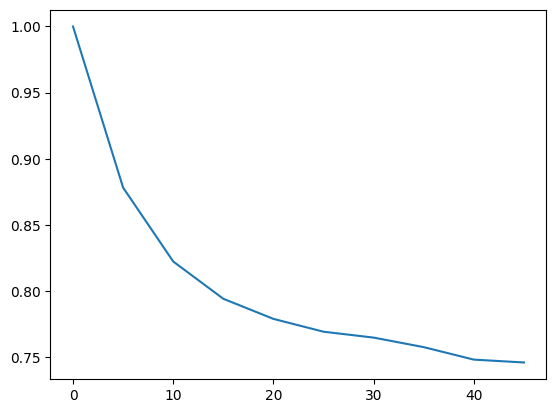

In [16]:
import matplotlib.pyplot as plt
plt.plot([5*i for i in range(len(prop))], prop)

In [17]:
df['absnettraded'] = abs(df['nettraded'])

In [18]:
df_2 = df.groupby(['date', 'ric']).sum()['absnettraded'].reset_index()
df_2

,date,ric,absnettraded
0,2018-01-02,AAXN.OQ,832044.75
1,2018-01-02,ABAX.OQ,1211754.80
2,2018-01-02,ABMD.OQ,2241014.44
3,2018-01-02,ALRM.OQ,24014921.05
4,2018-01-02,AMG.N,3988139.02
...,...,...,...
1948,2018-01-31,VOYA.N,22293905.13
1949,2018-01-31,WDR.N,446237.00
1950,2018-01-31,WETF.OQ,1745927.52
1951,2018-01-31,WGL.N,3912556.15


In [19]:
for i in range(6):
    df_2[f'absnettraded{i}'] = df_2.groupby(['ric'])['absnettraded'].shift(i)

In [20]:
df_2.dropna()

,date,ric,absnettraded,absnettraded0,absnettraded1,absnettraded2,absnettraded3,absnettraded4,absnettraded5
465,2018-01-09,AAXN.OQ,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75
466,2018-01-09,ABAX.OQ,3458172.82,3458172.82,2244671.88,1486796.49,2645484.86,1715616.26,1211754.80
467,2018-01-09,ABMD.OQ,2306708.90,2306708.90,1995287.49,1882327.27,2379716.12,3473663.11,2241014.44
468,2018-01-09,ALRM.OQ,19829661.86,19829661.86,44184486.64,17864621.29,20047067.52,32970045.92,24014921.05
469,2018-01-09,AMG.N,3945673.57,3945673.57,6000827.26,3771434.48,3700672.65,5630882.72,3988139.02
...,...,...,...,...,...,...,...,...,...
1948,2018-01-31,VOYA.N,22293905.13,22293905.13,22814977.86,7468984.14,6130316.00,13560821.60,20998043.51
1949,2018-01-31,WDR.N,446237.00,446237.00,703695.90,655949.80,160646.45,588301.45,768618.85
1950,2018-01-31,WETF.OQ,1745927.52,1745927.52,3477583.20,596082.31,917188.50,1327358.57,894280.39
1951,2018-01-31,WGL.N,3912556.15,3912556.15,9800958.67,3682137.43,2314636.78,5018684.85,9109510.94


In [21]:
df_2['normalizer'] =  df_2['absnettraded1'] + df_2['absnettraded2'] + df_2['absnettraded3'] + df_2['absnettraded4'] + df_2['absnettraded5']

In [22]:
df_2.dropna().sort_values(["ric", "date"])

,date,ric,absnettraded,absnettraded0,absnettraded1,absnettraded2,absnettraded3,absnettraded4,absnettraded5,normalizer
465,2018-01-09,AAXN.OQ,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3969175.60
558,2018-01-10,AAXN.OQ,1146250.20,1146250.20,803520.05,623051.25,687092.85,1069505.00,757481.75,3940650.90
651,2018-01-11,AAXN.OQ,644569.20,644569.20,1146250.20,803520.05,623051.25,687092.85,1069505.00,4329419.35
744,2018-01-12,AAXN.OQ,370268.60,370268.60,644569.20,1146250.20,803520.05,623051.25,687092.85,3904483.55
837,2018-01-16,AAXN.OQ,684364.30,684364.30,370268.60,644569.20,1146250.20,803520.05,623051.25,3587659.30
...,...,...,...,...,...,...,...,...,...,...
1580,2018-01-25,XEC.N,1058435.25,1058435.25,1805358.75,1223995.21,884096.09,896338.53,442549.76,5252338.34
1673,2018-01-26,XEC.N,634332.72,634332.72,1058435.25,1805358.75,1223995.21,884096.09,896338.53,5868223.83
1766,2018-01-29,XEC.N,654029.58,654029.58,634332.72,1058435.25,1805358.75,1223995.21,884096.09,5606218.02
1859,2018-01-30,XEC.N,1390392.22,1390392.22,654029.58,634332.72,1058435.25,1805358.75,1223995.21,5376151.51


In [23]:
df_2.dropna()

,date,ric,absnettraded,absnettraded0,absnettraded1,absnettraded2,absnettraded3,absnettraded4,absnettraded5,normalizer
465,2018-01-09,AAXN.OQ,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3.969176e+06
466,2018-01-09,ABAX.OQ,3458172.82,3458172.82,2244671.88,1486796.49,2645484.86,1715616.26,1211754.80,9.304324e+06
467,2018-01-09,ABMD.OQ,2306708.90,2306708.90,1995287.49,1882327.27,2379716.12,3473663.11,2241014.44,1.197201e+07
468,2018-01-09,ALRM.OQ,19829661.86,19829661.86,44184486.64,17864621.29,20047067.52,32970045.92,24014921.05,1.390811e+08
469,2018-01-09,AMG.N,3945673.57,3945673.57,6000827.26,3771434.48,3700672.65,5630882.72,3988139.02,2.309196e+07
...,...,...,...,...,...,...,...,...,...,...
1948,2018-01-31,VOYA.N,22293905.13,22293905.13,22814977.86,7468984.14,6130316.00,13560821.60,20998043.51,7.097314e+07
1949,2018-01-31,WDR.N,446237.00,446237.00,703695.90,655949.80,160646.45,588301.45,768618.85,2.877212e+06
1950,2018-01-31,WETF.OQ,1745927.52,1745927.52,3477583.20,596082.31,917188.50,1327358.57,894280.39,7.212493e+06
1951,2018-01-31,WGL.N,3912556.15,3912556.15,9800958.67,3682137.43,2314636.78,5018684.85,9109510.94,2.992593e+07


In [24]:
df_merged = df.merge(df_2, on = ['date', 'ric'], how = 'left')
df_merged.dropna().sort_values(['ric', 'date'])

,date,ric,time,side,qty,price,prevside,bucket,nettraded,prevnettraded0,...,prevnettraded9,absnettraded_x,absnettraded_y,absnettraded0,absnettraded1,absnettraded2,absnettraded3,absnettraded4,absnettraded5,normalizer
566485,2018-01-09,AAXN.OQ,3.476205e+13,1,49,40.75,1.0,3.476205e+13,1996.75,1996.75,...,-2557.50,1996.75,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3969175.60
566486,2018-01-09,AAXN.OQ,3.476207e+13,1,700,40.95,1.0,3.476207e+13,28665.00,28665.00,...,-5692.50,28665.00,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3969175.60
570559,2018-01-09,AAXN.OQ,3.552402e+13,-1,7,40.95,1.0,3.552402e+13,-286.65,-286.65,...,-4115.00,286.65,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3969175.60
570560,2018-01-09,AAXN.OQ,3.552402e+13,-1,93,40.95,-1.0,3.552402e+13,-3808.35,-3808.35,...,-4110.00,3808.35,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3969175.60
572125,2018-01-09,AAXN.OQ,3.584865e+13,1,100,40.00,-1.0,3.584865e+13,4000.00,4000.00,...,-4110.00,4000.00,803520.05,803520.05,623051.25,687092.85,1069505.00,757481.75,832044.75,3969175.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009788,2018-01-31,XEC.N,5.659099e+13,1,22,19.60,1.0,5.659099e+13,431.20,431.20,...,1901.00,431.20,1183076.11,1183076.11,1390392.22,654029.58,634332.72,1058435.25,1805358.75,5542548.52
2009789,2018-01-31,XEC.N,5.659099e+13,-1,99,19.59,1.0,5.659099e+13,-1939.41,-1939.41,...,1253.12,1939.41,1183076.11,1183076.11,1390392.22,654029.58,634332.72,1058435.25,1805358.75,5542548.52
2009954,2018-01-31,XEC.N,5.660598e+13,1,100,19.60,-1.0,5.660598e+13,1960.00,1960.00,...,-1901.00,1960.00,1183076.11,1183076.11,1390392.22,654029.58,634332.72,1058435.25,1805358.75,5542548.52
2009955,2018-01-31,XEC.N,5.660598e+13,1,22,19.60,1.0,5.660598e+13,431.20,431.20,...,-57.03,431.20,1183076.11,1183076.11,1390392.22,654029.58,634332.72,1058435.25,1805358.75,5542548.52


In [25]:
df_merged['normalizednettraded'] = df_merged['nettraded'] / df_merged['normalizer']
df_merged

,date,ric,time,side,qty,price,prevside,bucket,nettraded,prevnettraded0,...,absnettraded_x,absnettraded_y,absnettraded0,absnettraded1,absnettraded2,absnettraded3,absnettraded4,absnettraded5,normalizer,normalizednettraded
0,2018-01-02,CLI.N,3.450004e+13,-1,100,39.11,NaN,3.450004e+13,-3911.00,-3911.00,...,3911.00,6483909.62,6483909.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,CLI.N,3.450004e+13,1,200,39.11,-1.0,3.450004e+13,7822.00,7822.00,...,7822.00,6483909.62,6483909.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,CLI.N,3.450004e+13,-1,37,39.11,1.0,3.450004e+13,-1447.07,-1447.07,...,1447.07,6483909.62,6483909.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-02,TXRH.OQ,3.450016e+13,1,2,49.10,NaN,3.450016e+13,98.20,98.20,...,98.20,12020471.84,12020471.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-02,TXRH.OQ,3.450016e+13,1,12,49.10,1.0,3.450016e+13,589.20,589.20,...,589.20,12020471.84,12020471.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010830,2018-01-31,GCBC.OQ,5.669966e+13,-1,5,47.44,-1.0,5.669966e+13,-237.20,-237.20,...,237.20,7023708.45,7023708.45,4615522.99,1986356.61,2022616.88,5141842.82,3574776.56,17341115.86,-0.000014
2010831,2018-01-31,RGS.N,5.669975e+13,1,100,27.67,-1.0,5.669975e+13,2767.00,2767.00,...,2767.00,8269182.31,8269182.31,10602236.12,6565547.84,10266956.36,10788024.90,10265154.15,48487919.37,0.000057
2010832,2018-01-31,WGL.N,5.669998e+13,1,100,37.57,-1.0,5.669998e+13,3757.00,3757.00,...,3757.00,3912556.15,3912556.15,9800958.67,3682137.43,2314636.78,5018684.85,9109510.94,29925928.67,0.000126
2010833,2018-01-31,WGL.N,5.669998e+13,1,100,37.57,1.0,5.669998e+13,3757.00,3757.00,...,3757.00,3912556.15,3912556.15,9800958.67,3682137.43,2314636.78,5018684.85,9109510.94,29925928.67,0.000126


In [26]:
for i in range(10):
    df_merged[f'prevnettradednormalized{i}'] = df_merged[f'prevnettraded{i}']/df_merged['normalizer']


In [27]:
X, y = df_merged.dropna()[[f"prevnettradednormalized{k}" for k in range(1, 10)]], df_merged.dropna()["normalizednettraded"]
model = LinearRegression()
model.fit(X, y)
coefs = model.coef_
coefs

array([0.1678741 , 0.08872598, 0.02579302, 0.00995647, 0.03819733,
       0.03661447, 0.0271341 , 0.00957545, 0.01482519])

In [28]:
prop_normalized = 1 - np.cumsum(np.insert(coefs, 0, 0))
prop_normalized

array([1.        , 0.8321259 , 0.74339992, 0.7176069 , 0.70765043,
       0.6694531 , 0.63283863, 0.60570453, 0.59612909, 0.5813039 ])

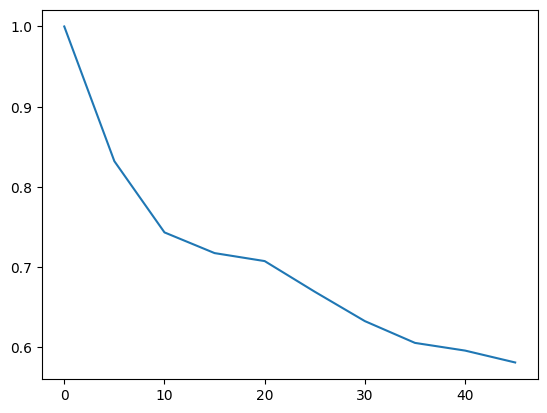

In [29]:
plt.plot([5*i for i in range(len(prop_normalized))], prop_normalized)